# Grafica Lista de adyacencia sin coordenadas ni direcciones

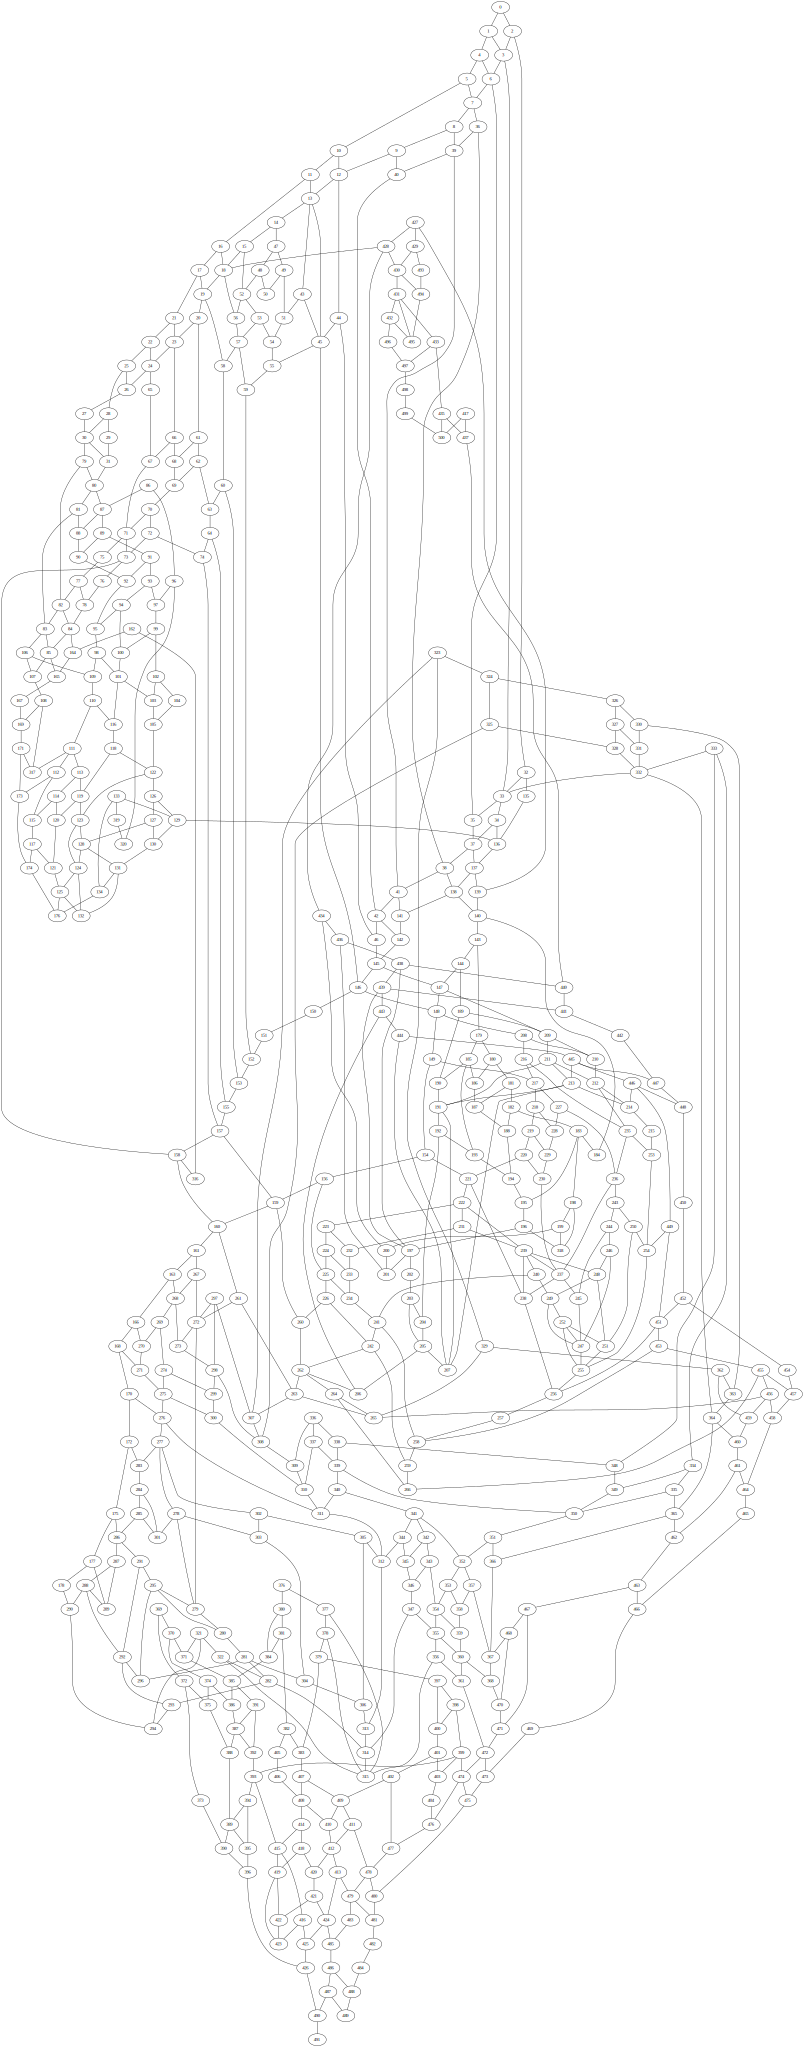

In [1]:
import graphviz as gv
def drawG_al(G, directed=False, path=[]):
  graph = gv.Digraph("felicidad") if directed else gv.Graph("alegria")
  n = len(G)
  added = set()
  for v, u in enumerate(path):
    if u != -1:
      graph.edge(str(u), str(v), dir="forward", penwidth="1", color="orange")
      added.add(f"{u},{v}")
      added.add(f"{v},{u}")
  for u in range(n):
    for v in G[u]:
      if not directed and not f"{u},{v}" in added:  
        added.add(f"{u},{v}")
        added.add(f"{v},{u}")
        graph.edge(str(u), str(v))
      elif directed:
        graph.edge(str(u), str(v))
  return graph

G_sin = []
with open("lista_adyacencia.al") as f:
  for line in f:
    if line == "-\n":
      G_sin.append([])
    else:
      G_sin.append([int(x) for x in line.split()])

#print(G_sin)
drawG_al(G_sin)

# Algoritmo de cálculo de peso en función a longitud, hora del dia , factor de trafico

In [52]:
import math
hora = 18 # representa hora. Ej: 18 = 6pm

LA = [] # lista adyacencia de intersecciones
with open("lista_adyacencia.al") as f:
    for line in f:
        if line == "-\n":
            LA.append([])
        else:
            LA.append([int(x) for x in line.split()])

FT = [] # factor trafico de intersecciones
# factor trafico es un numero de 0 a 23 realizado por un MOD de un promedio de datos
# al operarse con la hora, mientras mas se acerque el factor trafico a la hora (que 
# tambien va de 0 a 23) mejor sera su eficiencia
with open("factor_trafico.al") as f:
    for line in f:
        if line == "-\n":
            FT.append([])
        else:
            FT.append([int(x) for x in line.split()])

CO = [] # coordenadas de intersecciones
with open("data_latitud_longitud.al") as f:
    for line in f:
        if line == "-\n":
            CO.append([])
        else:
            coords = line.split()
            cx = float(coords[0])
            cy = float(coords[1])
            CO.append([cx,cy])

Pesos = []
for tupla in LA:
    coords1 = CO[i]
    coord1x = coords1[0]
    coord1y = coords1[1]
    peso = []
    for item in tupla:

        coords2 = CO[item]
        coord2x = coords2[0]
        coord2y = coords2[1]
        
        distx = abs(coord1x - coord2x)
        disty = abs(coord1y - coord2y)
        dist = math.sqrt( (distx ** 2) + (disty ** 2) )

        item_ft = FT[item][0]
        modificador = abs(int(item_ft) - hora)+1

        peso.append(dist * 100 * modificador)
    Pesos.append(peso)
print(Pesos)

[[0.25556603841683895, 0.14849242404812552], [0.0, 0.19365949498593216, 2.7238942710590375], [0.0, 0.19365949498593216, 0.985170036085027], [0.25556603841683895, 0.14849242404812552, 1.281688339650824, 1.9871587757381046], [0.25556603841683895, 2.311550129236746, 1.281688339650824], [2.7238942710590375, 0.9708243919426472, 5.825195275695053], [0.19365949498593216, 2.7238942710590375, 0.9708243919426472, 3.7329615588689915], [2.311550129236746, 1.281688339650824, 0.400711866557678, 3.493862618922455], [0.9708243919426472, 1.2322844639097061, 4.679850424952188], [0.400711866557678, 1.1646201097334825, 5.279304499648485], [2.311550129236746, 3.6640010917040606, 1.1646201097334825], [5.825195275695053, 1.8290776364031611, 3.695086467185026], [1.2322844639097061, 5.825195275695053, 1.8290776364031611, 4.964449617022225], [3.6640010917040606, 1.1646201097334825, 11.16827547116951, 3.8119459597422685], [1.8290776364031611, 10.80844429137282, 3.2977643942539547], [11.16827547116951, 11.0800555